<a href="https://colab.research.google.com/github/alsoreezu/Dragonfruit-Classifier-using-YOLOv5/blob/master/yolo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Install dependencies <h1>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
Setup complete. Using torch 1.11.0+cu113 (Tesla P100-PCIE-16GB)


<h1>Unzip dataset uploaded from local disk

In [ ]:
from google.colab import files
!unzip -q /content/train.zip -d ../
!unzip -q /content/valid.zip -d ../

<h1>Training the model on the dataset

In [ ]:
  !python train.py --img 640 --batch 16 --epochs 200 --data data.yaml --weights yolov5s.pt --cache 

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-163-gb53917d torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

<h1>Inference on validation data using trained model

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-163-gb53917d torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Traceback (most recent call last):
  File "detect.py", line 252, in <module>
    main(opt)
  File "detect.py", line 247, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 92, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/models/common.p

<h1>Displaying Inference on Test Data

In [ ]:
import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 173:
      display(Image(filename=imageName))
      print("\n")

<h1>Evaluating Performance on Dragonfruit dataset

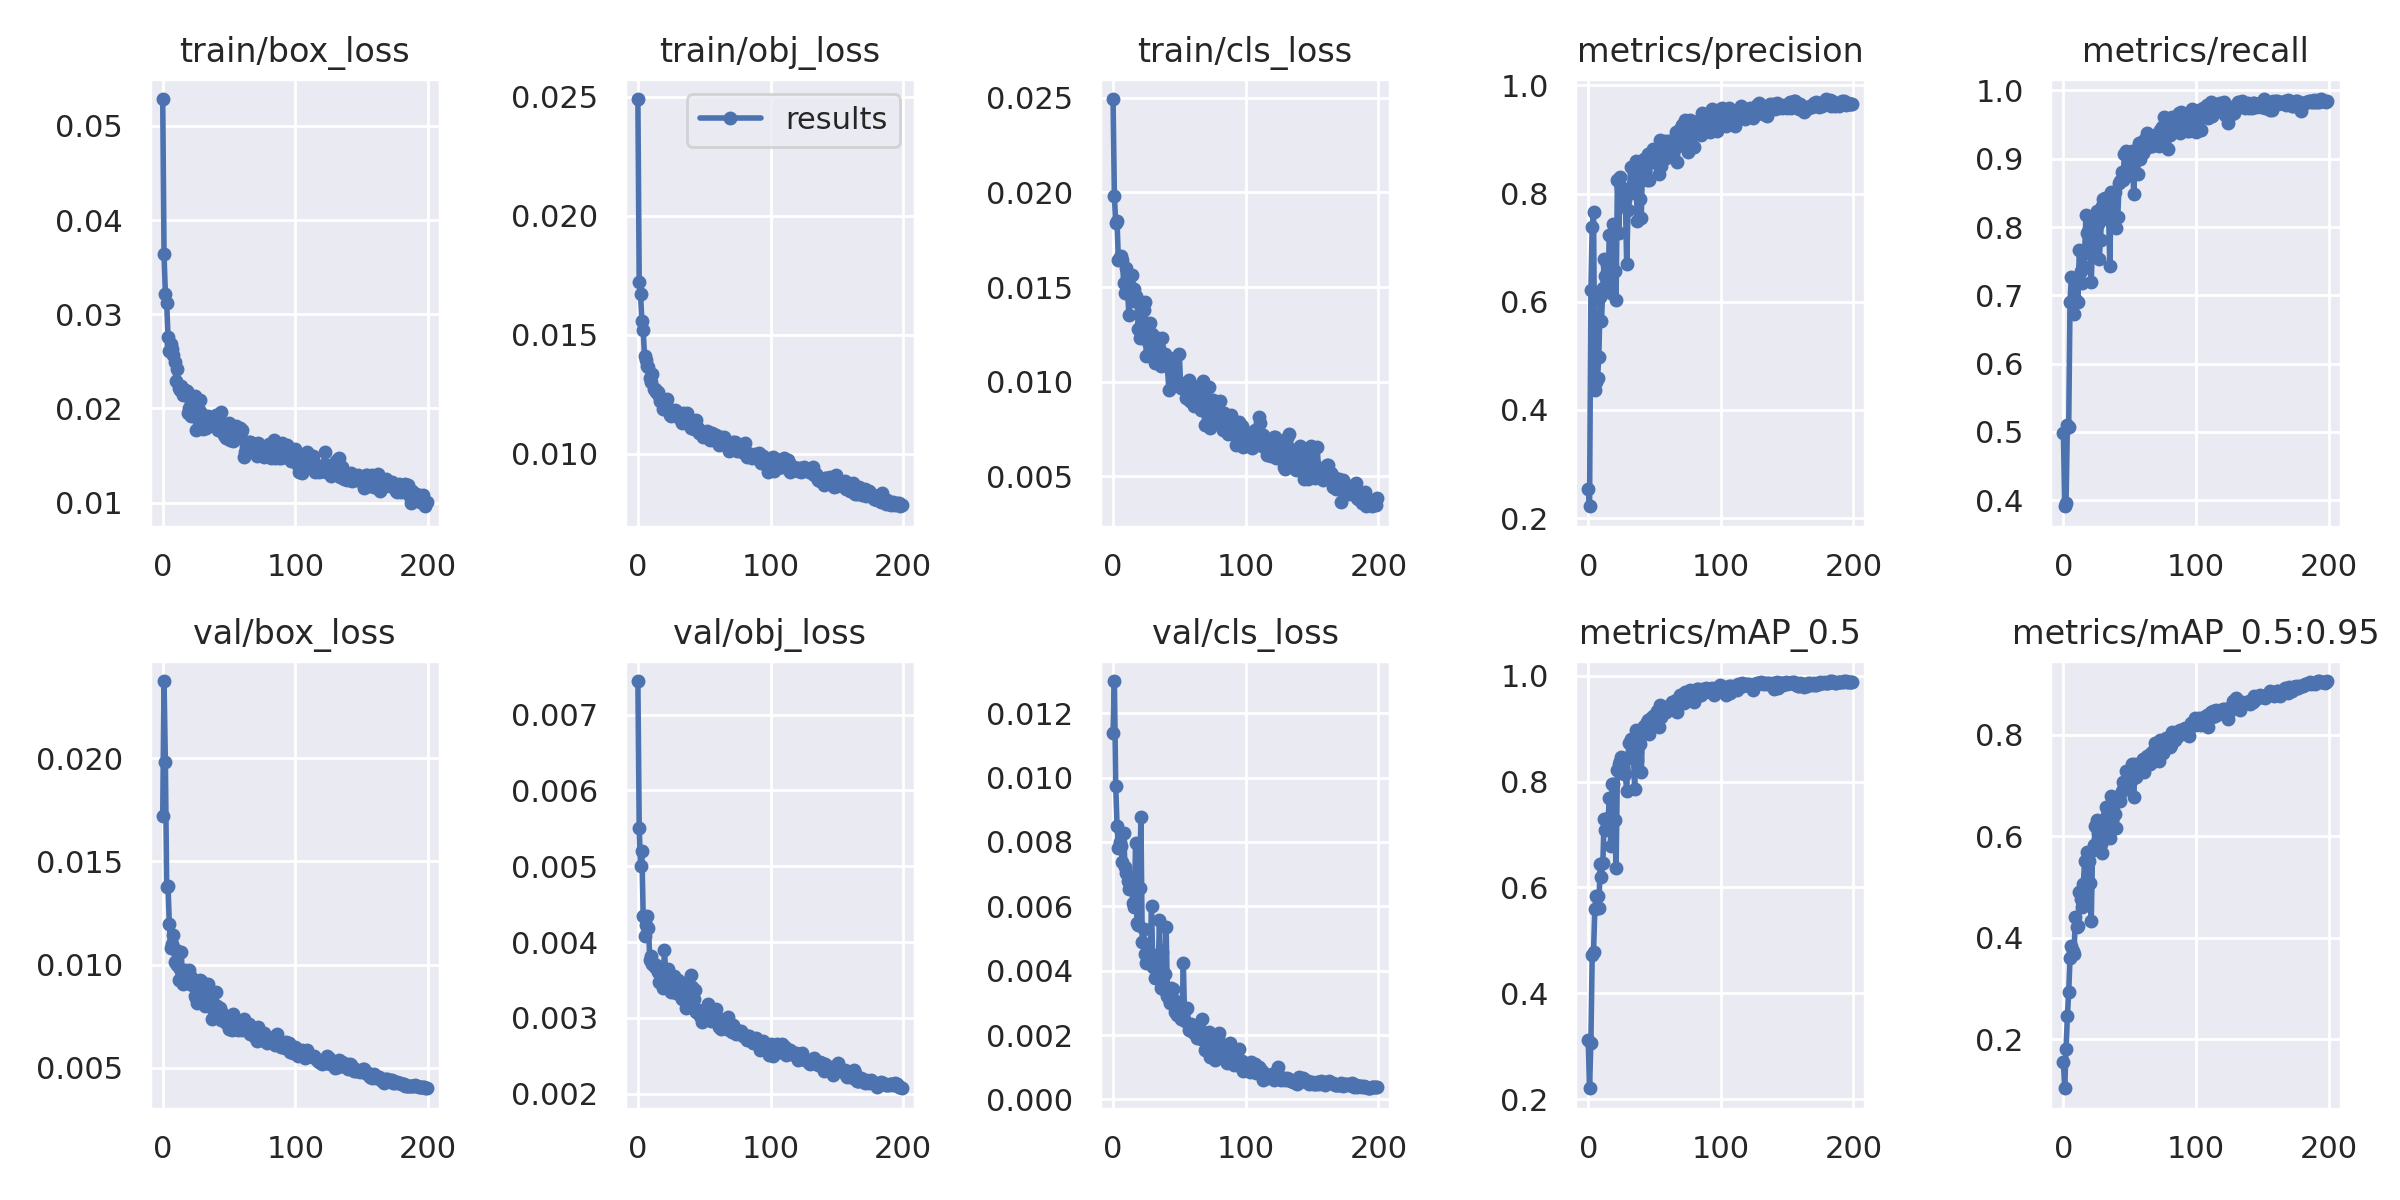

In [ ]:
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=1000)

<h1>Downloading all files for local use

In [ ]:
!zip -r /content/yolov5.zip /content/yolov5
!zip -r /content/train.zip /content/train
!zip -r /content/valid.zip /content/valid

files.download('/content/yolov5.zip')
files.download('/content/train.zip')
files.download('/content/valid.zip')

Streaming output truncated to the last 5000 lines.
  adding: content/train/images/881_jpg.rf.300a4c878562fb4865fe16fd4e9980b1.jpg (deflated 1%)
  adding: content/train/images/564_jpg.rf.86f7c3a1de134b506db3c2af6a7390d9.jpg (deflated 1%)
  adding: content/train/images/561_jpg.rf.6f418f450201f4698be1d20fc7846967.jpg (deflated 1%)
  adding: content/train/images/937_jpg.rf.bdaf433441eda78eb65a541773dcb0ef.jpg (deflated 2%)
  adding: content/train/images/74_jpg.rf.030f819eac3cb7875328325f47cad833.jpg (deflated 1%)
  adding: content/train/images/65_jpg.rf.30e89629789dff475368940b382ba577.jpg (deflated 2%)
  adding: content/train/images/522_jpg.rf.e9aab141770d15473cc6877e31a5a693.jpg (deflated 2%)
  adding: content/train/images/986_jpg.rf.c59e8e3be7fe64cd13e0ee67d2504512.jpg (deflated 3%)
  adding: content/train/images/695_jpg.rf.d93f7d84aecbd254810ff4e81fa36aac.jpg (deflated 2%)
  adding: content/train/images/593_jpg.rf.13ba4dd7f611cc9ead02c2532cb10fbb.jpg (deflated 1%)
  adding: content/tra

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>